In [8]:
"""
# Tumor(Breast) Image Classification Using CNN
"""

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

"""# Data Importation
**Importing basic libraries**
"""

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os 
import pathlib 
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers 

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Github/
%cd TumorDetect
%ls -al

/content/drive/MyDrive/Github
/content/drive/MyDrive/Github/TumorDetect
total 17
-rw------- 1 root root 1779 Mar 31 13:03 'Copy of Untitled1.ipynb'
drwx------ 2 root root 4096 Mar 31 12:32  .git/
drwx------ 2 root root 4096 Mar 31 12:34  Images/
-rw------- 1 root root 1511 Mar 31 12:27  README.md
-rw------- 1 root root 4698 Mar 31 12:27  tumor_detection_project.py


In [6]:
"""**Defining the path**"""

path = '/content/drive/MyDrive/Github/TumorDetect/Images'
data_dir = pathlib.Path(path)

"""**Getting class names**"""

class_names = np.array([item.name for item in data_dir.glob("*")])
class_names

"""**Define paths and image count**"""

benignPath = pathlib.Path(os.path.join(data_dir,'benign'))
normalPath = pathlib.Path(os.path.join(data_dir,'normal'))
malignantPath = pathlib.Path(os.path.join(data_dir,'malignant'))

"""**Image count**"""

benignImageCount = len(list(benignPath.glob('*.png')))
malignantImageCount = len(list(malignantPath.glob('*.png')))
normalImageCount = len(list(normalPath.glob('*.png')))
totalImageCount = benignImageCount + malignantImageCount + normalImageCount

print("Total number of Images: ", totalImageCount)
print("No. of Benign (non-dangerous) Images: {}({})".format(benignImageCount, round(benignImageCount*100/totalImageCount, 2)))
print("No. of Malignant (dangerous) Images: {}({})".format(malignantImageCount, round(malignantImageCount*100/totalImageCount, 2)))
print("No. of Normal (No Traces) Images: {}({})".format(normalImageCount, round(normalImageCount*100/totalImageCount, 2)))

Total number of Images:  1587
No. of Benign (non-dangerous) Images: 900(56.71)
No. of Malignant (dangerous) Images: 421(26.53)
No. of Normal (No Traces) Images: 266(16.76)


In [9]:
"""# Build the CNN"""

batch_size = 32
img_height = 224
img_width = 224

"""**Separating data sets**"""


train_data = image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

val_data = image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=123,image_size=(img_height,img_width),batch_size=batch_size)


Found 1587 files belonging to 3 classes.
Using 1270 files for training.
Found 1587 files belonging to 3 classes.
Using 317 files for validation.


In [10]:
"""# Define the Model
**Roadmap**
##### We rescale images add a Dropout to avoid the overfitting as we have 4 class the last layer contain the number of class and we have softmax as activation,it will give us a pourcentage of each class and we'll choice the maximum pourcentage as the class
"""
# 7 layer CNN Model Architecture with 3 Convolution layer each followed by max pooling layer
# Filter size =3X3 and Activation function = Relu
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])

In [11]:
"""# Compile and fit the Model"""

model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

epochs = 2
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data, 
                    batch_size=batch_size)


Epoch 1/2


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 [==============================] - 172s 3s/step - loss: 0.9077 - accuracy: 0.5661 - val_loss: 0.7781 - val_accuracy: 0.6688
Epoch 2/2
40/40 [==============================] - 84s 2s/step - loss: 0.6492 - accuracy: 0.7118 - val_loss: 0.7975 - val_accuracy: 0.6656


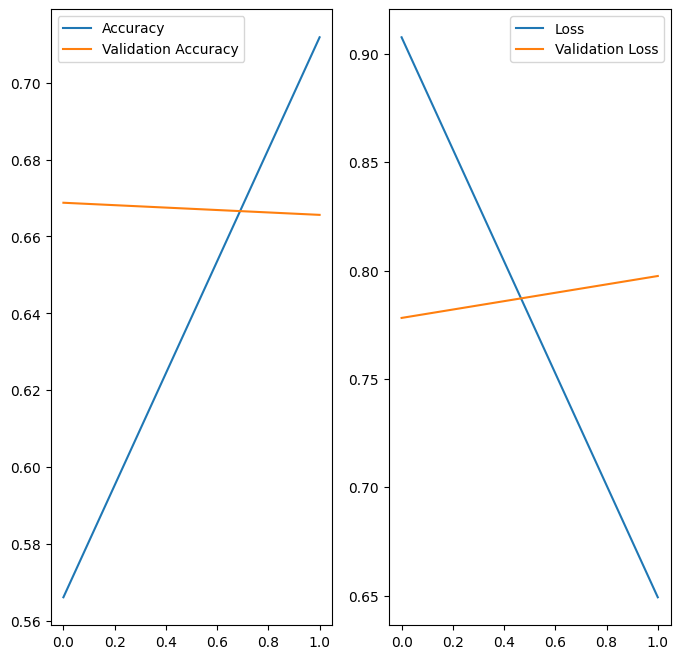

In [12]:
"""**Keys**"""

history.history.keys()

"""# Accuracy vs Lost"""

acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

10/10 [==============================] - 9s 427ms/step - loss: 0.7975 - accuracy: 0.6656
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                 

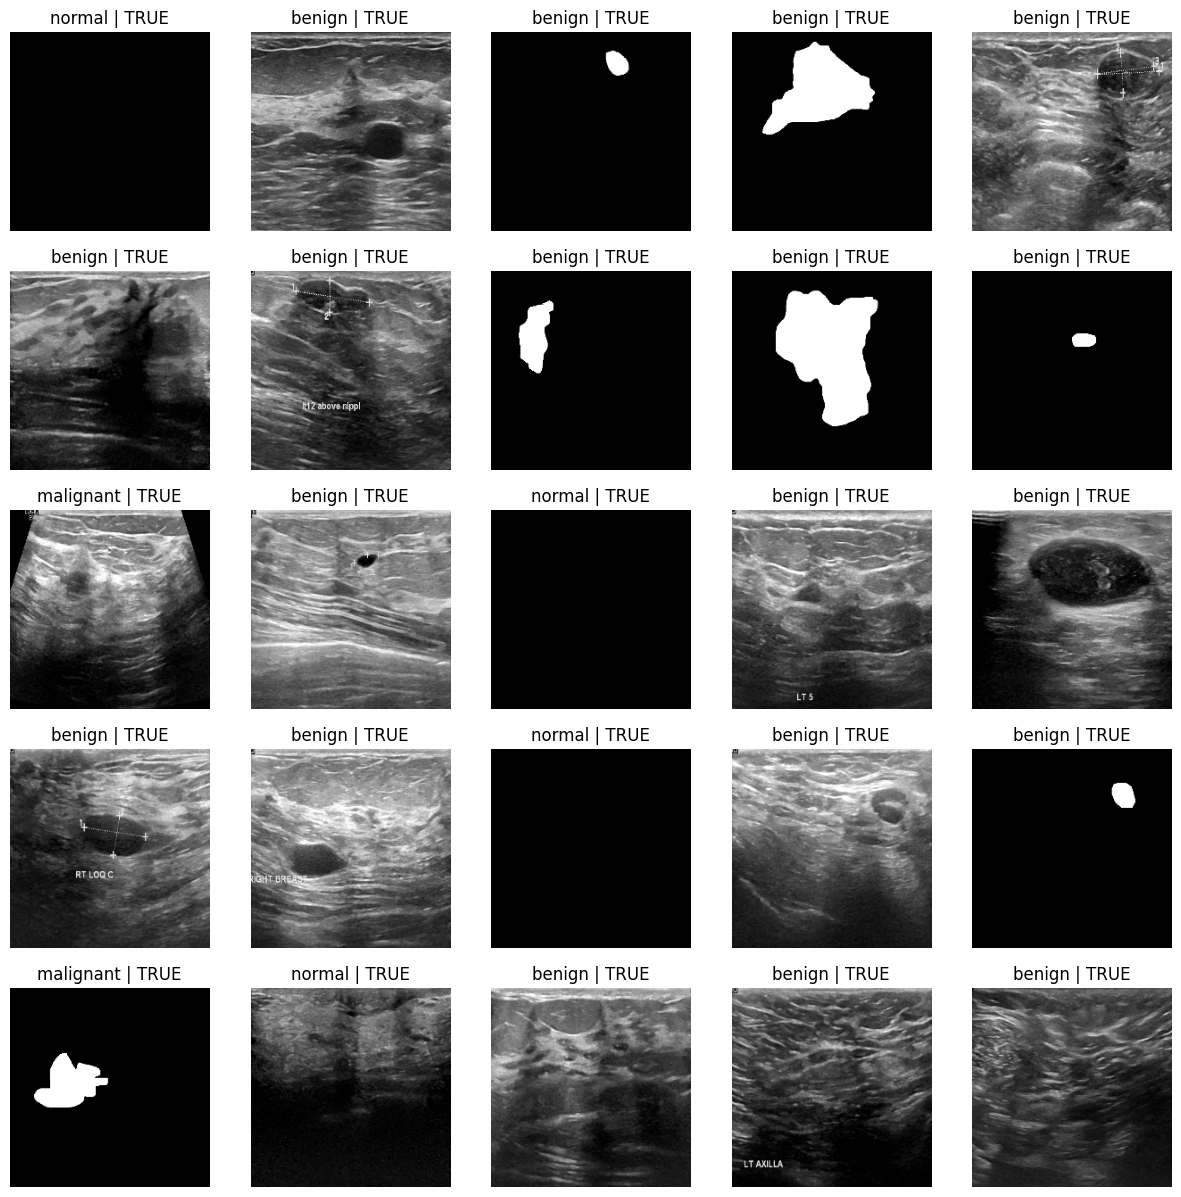

In [13]:
"""**Evaluating - İt return the lost and accuracy**"""

model.evaluate(val_data)

"""**Model summary**"""

model.summary()

"""# Predictions Testing Model"""

plt.figure(figsize=(15, 15))
class_names = val_data.class_names
result = ' | False'
for images, labels in val_data.take(1):
    for i in range(25):
        
        ax = plt.subplot(5, 5, i + 1)
        img = images[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions)
        if class_names[predicted_class] == class_names[labels[i]]:
            result = ' | TRUE'
            
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[predicted_class]+result)
        plt.axis("off")